In [149]:
#The target variable is whether the frame is a commercial or not
#Dataset can be found:
#http://archive.ics.uci.edu/ml/datasets/tv+news+channel+commercial+detection+dataset#

In [150]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
data=pd.read_csv(
  r'D:\data_storage\Projects\ml_commercial_detection\parsed_data\BBC.csv',
  delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 232 entries, index to 4125
dtypes: float64(228), int64(4)
memory usage: 31.4 MB


In [153]:
data['target']=data['target'].replace(-1,0)

In [154]:
data.shape

(17720, 232)

In [155]:
data=data.iloc[1:1000,:]
data.shape

(999, 232)

In [156]:
#Column with name 123 to 2123 are bag words, we will not use them
cols=cols=list(range(2,18))
cols=[str(x) for x in cols]
cols.append('4124')
cols.append('4125')
cols.insert(0,'target')

data=data[cols]
data.head(5)

,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,4124,4125
1,1,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,3466.266113,904.122925,7580.040039,1391.858643,724.249573,1722.364502,110.605591,47.206207,0.332664,0.766184
2,1,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,3798.196533,745.916321,7490.365723,1466.404785,1430.728149,2264.551025,139.833878,51.343670,0.346674,0.225022
3,1,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,3761.712402,840.047485,7411.335938,1639.901367,1154.446777,1610.234619,144.305328,50.244751,0.993323,0.840083
4,1,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,3784.488037,892.398682,7297.695801,1726.300415,1548.101074,1549.001587,131.560104,50.382572,0.341520,0.710470
5,1,1.729633,0.493336,4.814710,1.349464,0.016101,0.011201,0.127927,0.067082,3735.518799,973.172607,7216.269043,1884.152466,1101.142212,1400.455933,127.362915,45.062538,0.126540,0.453794


In [157]:
#Let's give the columns their names
data.rename(columns={
 '2':'motion_distribution_mean',
 '3':'motion_distribution_variance',
 '4':'frame_difference_distribution_mean',
 '5':'frame_difference_distribution_variance',
 '6':'short_time_energy_mean',
 '7':'short_time_energy_variance',
 '8':'zcr_mean',
 '9':'zcr_variance',
 '10':'spectral_centroid_mean',
 '11':'spectral_centroid_variance',
 '12':'spectral_roll_off_mean',
 '13':'spectral_roll_off_variance',
 '14':'spectral_flux_mean',
 '15':'spectral_flux_variance',
 '16':'fundamental_frequency_mean',
 '17':'fundamental_frequency_variance',
 '4124':'edge_change_ratio_mean',
 '4125':'edge_change_ratio_variance'
},inplace=True)


In [161]:
#Let's normalize and scale the data
from sklearn.preprocessing import minmax_scale, normalize
for col in data.drop(columns=['target']):
  data[col]=normalize([np.array(data[col])])[0]
  data[col]=minmax_scale(data[col])

In [162]:
data.head(5)

,target,motion_distribution_mean,motion_distribution_variance,frame_difference_distribution_mean,frame_difference_distribution_variance,short_time_energy_mean,short_time_energy_variance,zcr_mean,zcr_variance,spectral_centroid_mean,spectral_centroid_variance,spectral_roll_off_mean,spectral_roll_off_variance,spectral_flux_mean,spectral_flux_variance,fundamental_frequency_mean,fundamental_frequency_variance,edge_change_ratio_mean,edge_change_ratio_variance
1,1,0.077688,0.032239,0.075872,0.055490,0.281929,0.536103,0.158692,0.322816,0.819390,0.481447,0.892334,0.397524,0.156655,0.390498,0.425369,0.378989,0.333062,0.768294
2,1,0.164151,0.033735,0.187012,0.102339,0.514948,0.667150,0.221190,0.185131,0.937848,0.374765,0.840264,0.427152,0.309466,0.513424,0.707775,0.466522,0.347093,0.225533
3,1,0.258803,0.046473,0.197941,0.046562,0.473215,0.515025,0.213950,0.176976,0.924828,0.438239,0.794375,0.496110,0.249707,0.365076,0.750979,0.443273,0.994735,0.842412
4,1,0.253131,0.053001,0.203096,0.045808,0.709670,0.562789,0.267329,0.235490,0.932956,0.473541,0.728389,0.530450,0.334854,0.351193,0.627833,0.446189,0.341932,0.712416
5,1,0.139427,0.029089,0.091381,0.022470,0.545968,0.522597,0.333850,0.331011,0.915480,0.528008,0.681108,0.593189,0.238177,0.317515,0.587280,0.333636,0.126622,0.454980


In [163]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
  #if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
  #  columnNames = columnNames[:10]
  ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
  corrs = df.corr().values
  for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate(
      'r=%.3f' % corrs[i, j], (0.8, 0.2), 
      xycoords='axes fraction', ha='right', 
      va='center', size=textSize
    )
  plt.suptitle('Scatter and Density Plot')
  plt.show()

In [164]:
#plotScatterMatrix(data,60,20)

In [165]:
x=data.drop(['target'],axis=1)
y=data['target']

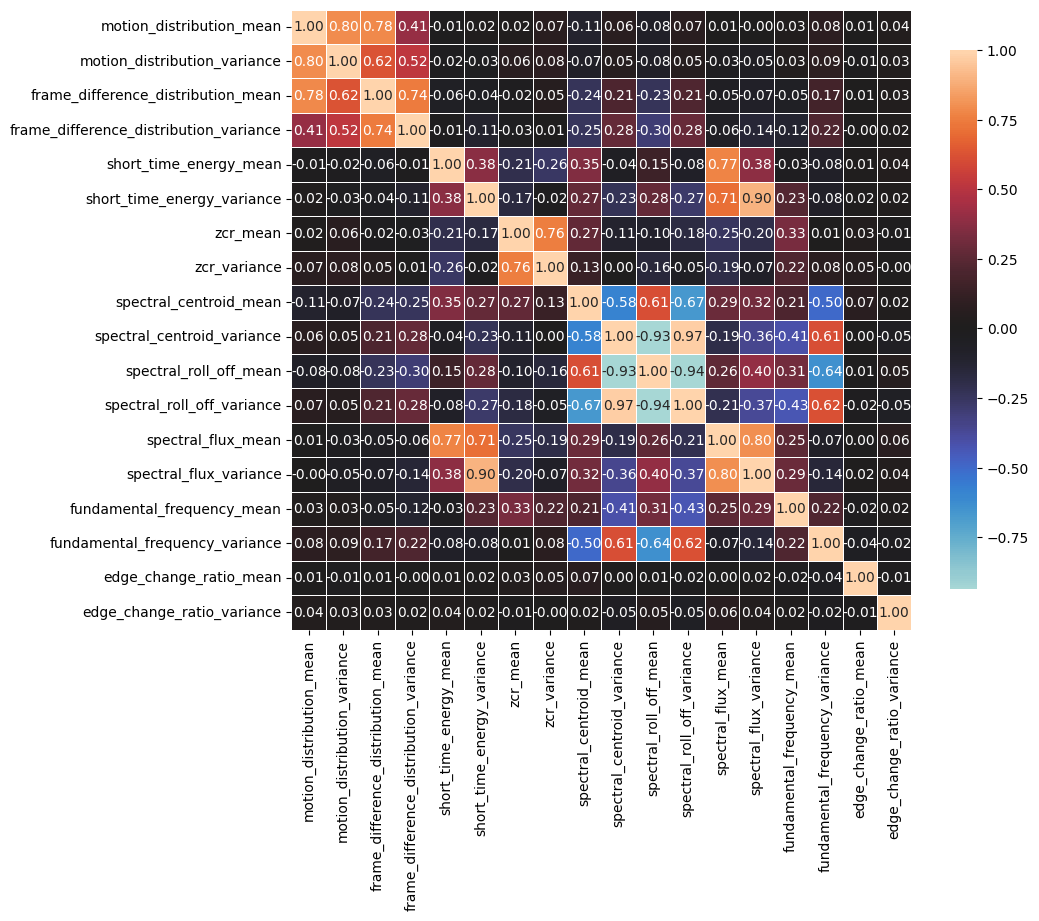

In [166]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(x)

In [168]:
#Let's try to see what kind of results we can get 
#from a random forest classifier and then we'll see if
#we can improve it by transforming the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier().fit(x_train,y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred=m.predict(x_test))

0.912

In [169]:
#Let's look at it's performance on the training data
accuracy_score(y_train,y_pred=m.predict(x_train))

1.0

#### Let's take a look at the importance of each features

In [167]:
from sklearn.feature_selection import mutual_info_classif
def get_importance(x,y):
  imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
  imp.columns=['Importance']
  return imp.sort_values(by='Importance',ascending=False)
get_importance(x,y)

,Importance
short_time_energy_variance,0.305238
spectral_flux_variance,0.264163
spectral_centroid_variance,0.121083
spectral_roll_off_variance,0.115679
spectral_roll_off_mean,0.113107
spectral_flux_mean,0.103135
spectral_centroid_mean,0.081892
fundamental_frequency_mean,0.052097
motion_distribution_variance,0.046231
motion_distribution_mean,0.033642


As we can see, 50% the information available from the features is in the top 3 features.

In [174]:
import shap

In [175]:
explainer =shap.TreeExplainer(m)
shap_values=explainer.shap_values(x)
expected_value=explainer.expected_value

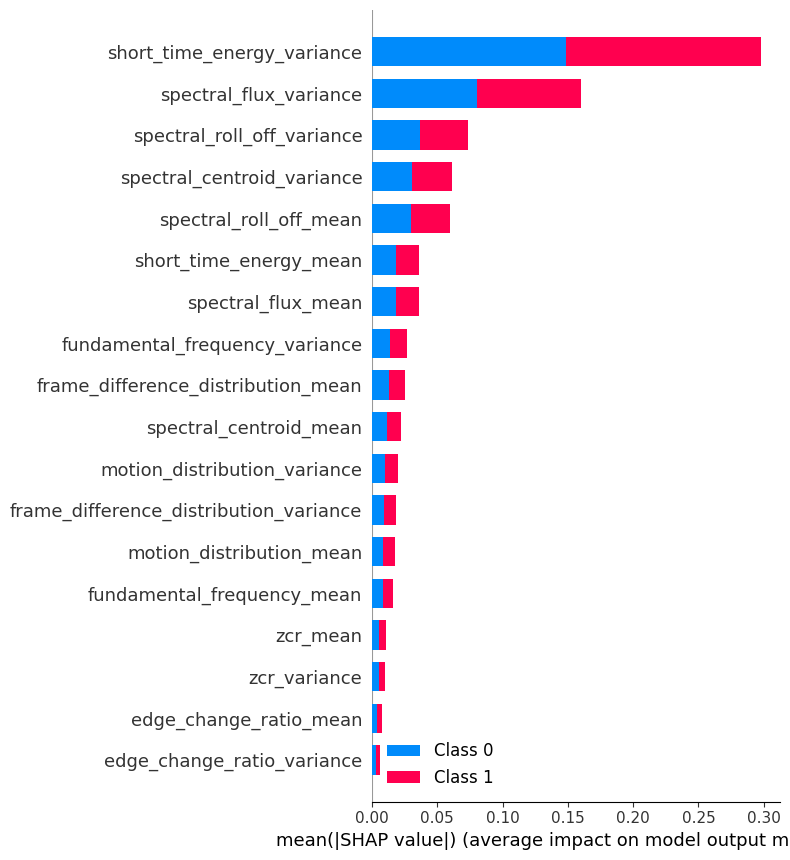

In [176]:
shap.summary_plot(shap_values,x,title="shap summary plot")

Here we have a visualization of the average impact of each feature on the prediction when using a random forest with the default hyperparameters. As expected the distribution loosely matches the mutual info values.

#### Now let's look at example of how the features affect the classification

In [177]:
m=RandomForestClassifier().fit(x,y)
explainer=shap.Explainer(m.predict,x)
sv=explainer(x)

Permutation explainer: 1000it [08:38,  1.89it/s]                        


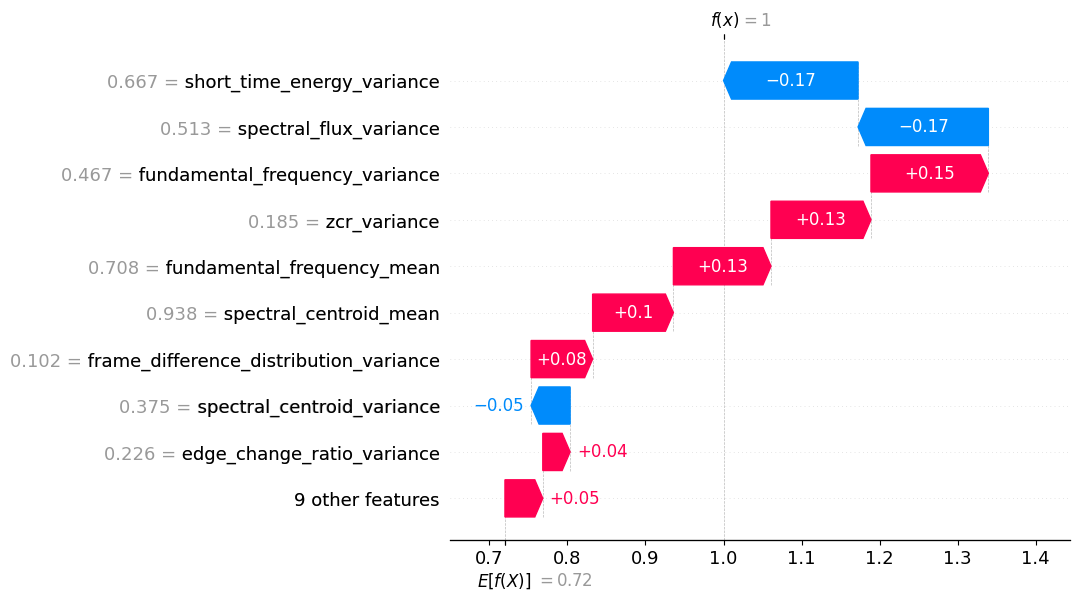

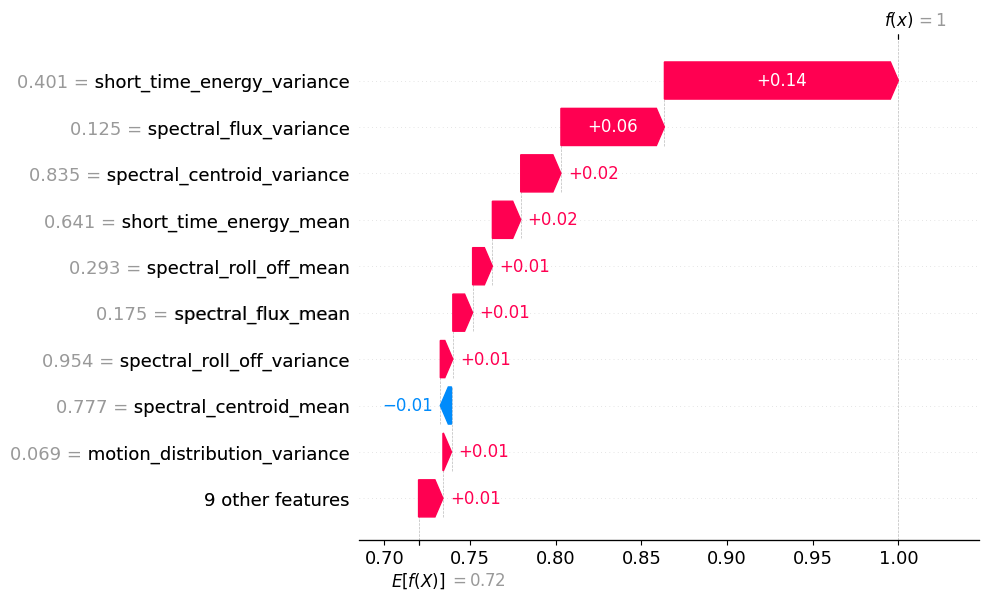

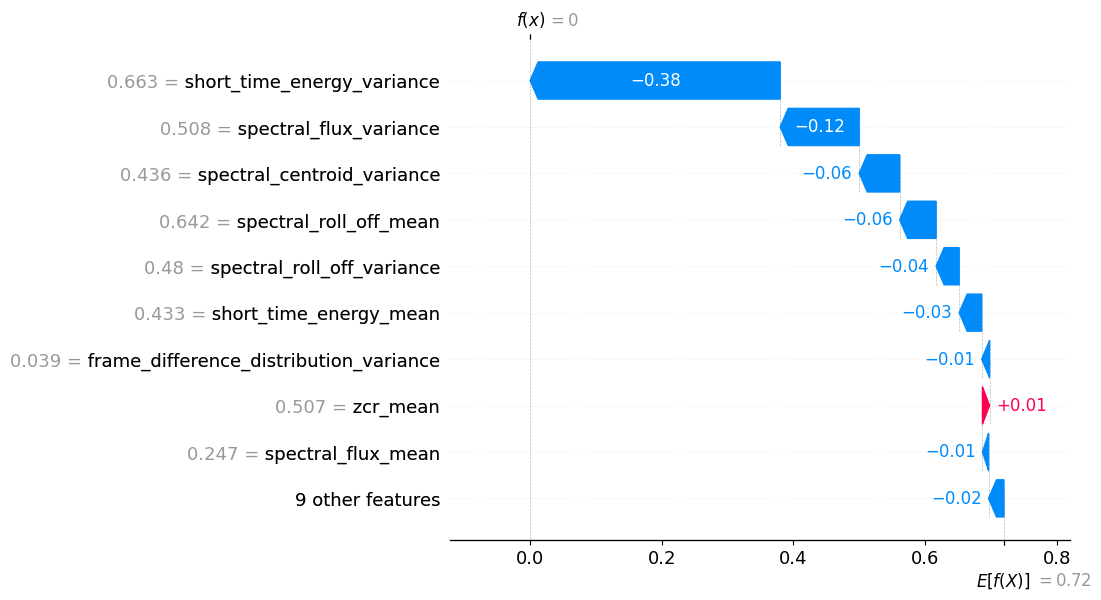

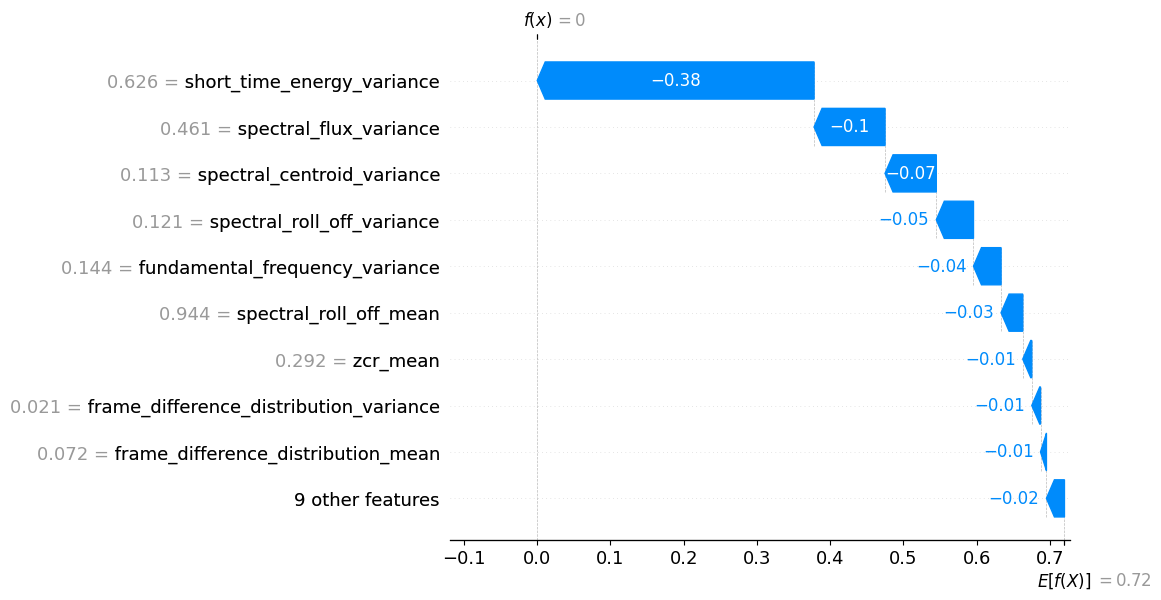

In [211]:
#357 not commercial
#1 is commercial
for idx in [1,100,357,358]:
  exp = shap.Explanation(sv.values, sv.base_values[0], sv.data, feature_names=list(x.columns))
  shap.plots.waterfall(exp[idx])
  shap.initjs()
  #shap.plots.force(exp[idx])

As we can see, the features do not necessarly all point to the same conclusion.

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [197]:
m=RandomForestClassifier().fit(x_train,y_train)
predictions=m.predict(x_train)
surrogate=DecisionTreeClassifier(random_state=42).fit(x_train,predictions)

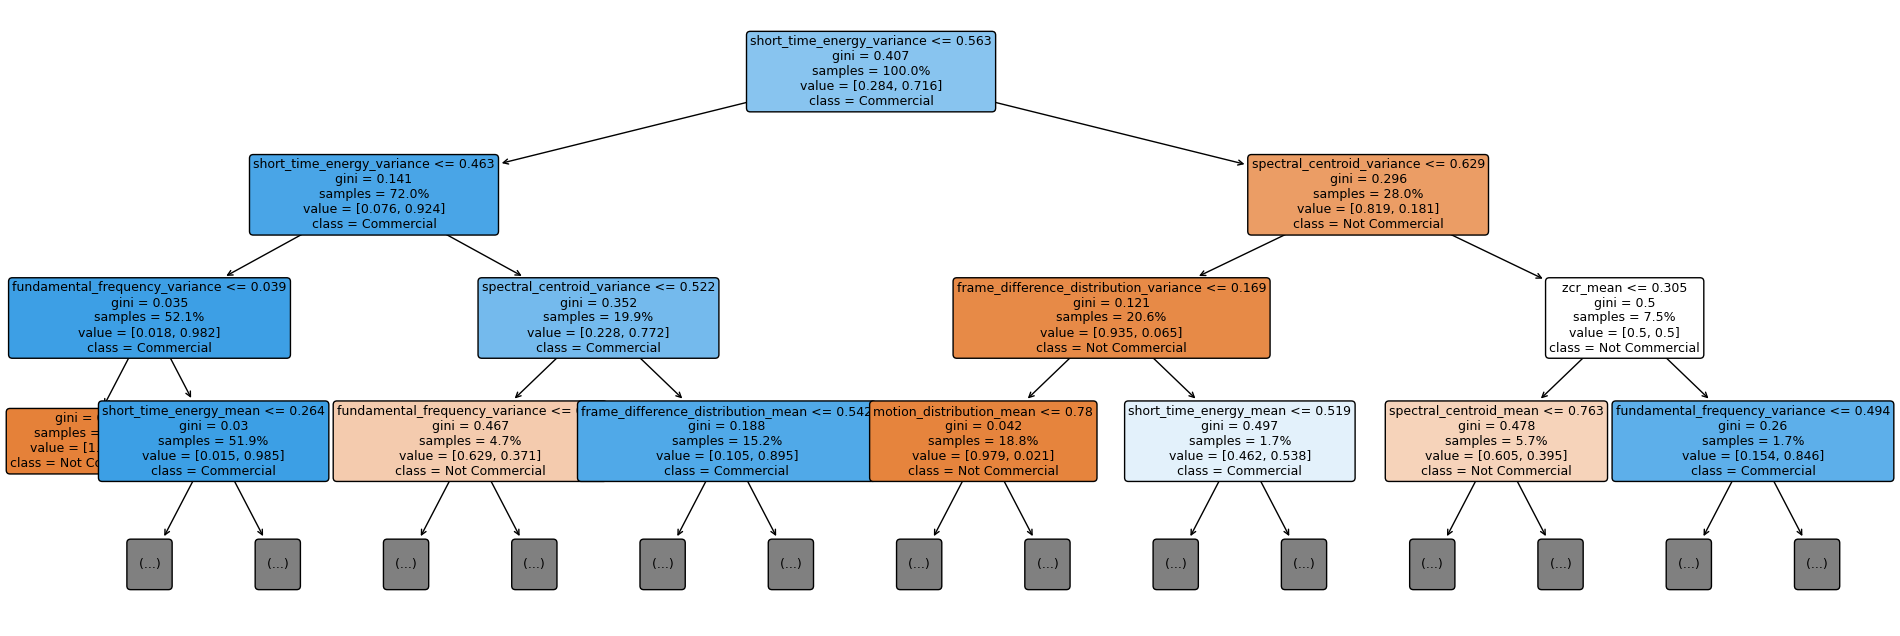

In [210]:
fig = plt.figure(figsize=(24, 8))
vis = tree.plot_tree(
  surrogate, 
  feature_names = list(x.columns), 
  class_names = ['Not Commercial', 'Commercial'], 
  max_depth=3, 
  fontsize=9, 
  proportion=True, 
  filled=True, 
  rounded=True
)
fig.savefig("decision_tree.jpg")